## Import Used Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import os
import tensorflow
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D
from keras.initializers import glorot_uniform
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
import warnings
warnings.filterwarnings(action='ignore')

## Loading Images File

In [2]:
data_dir = "D:/neu/capstone/crop_disease_data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir ="D:/neu/capstone/crop_disease_data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_dir = "D:/neu/capstone/crop_disease_data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

## Preparing Images For Training By Image Preprocessing

In [5]:
train_datagen= ImageDataGenerator(
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1/255.0,
    fill_mode='nearest',
    validation_split=0.1,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2)
val_datagen= ImageDataGenerator(
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    rescale=1/255.0,
    validation_split=0.1,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2)
train_dataset= train_datagen.flow_from_directory(train_dir,batch_size=128,target_size=(210,210),color_mode='rgb',class_mode='categorical',seed=3)
valid_dataset=val_datagen.flow_from_directory(valid_dir,batch_size=128,target_size=(210,210),color_mode='rgb',class_mode='categorical',seed=3)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


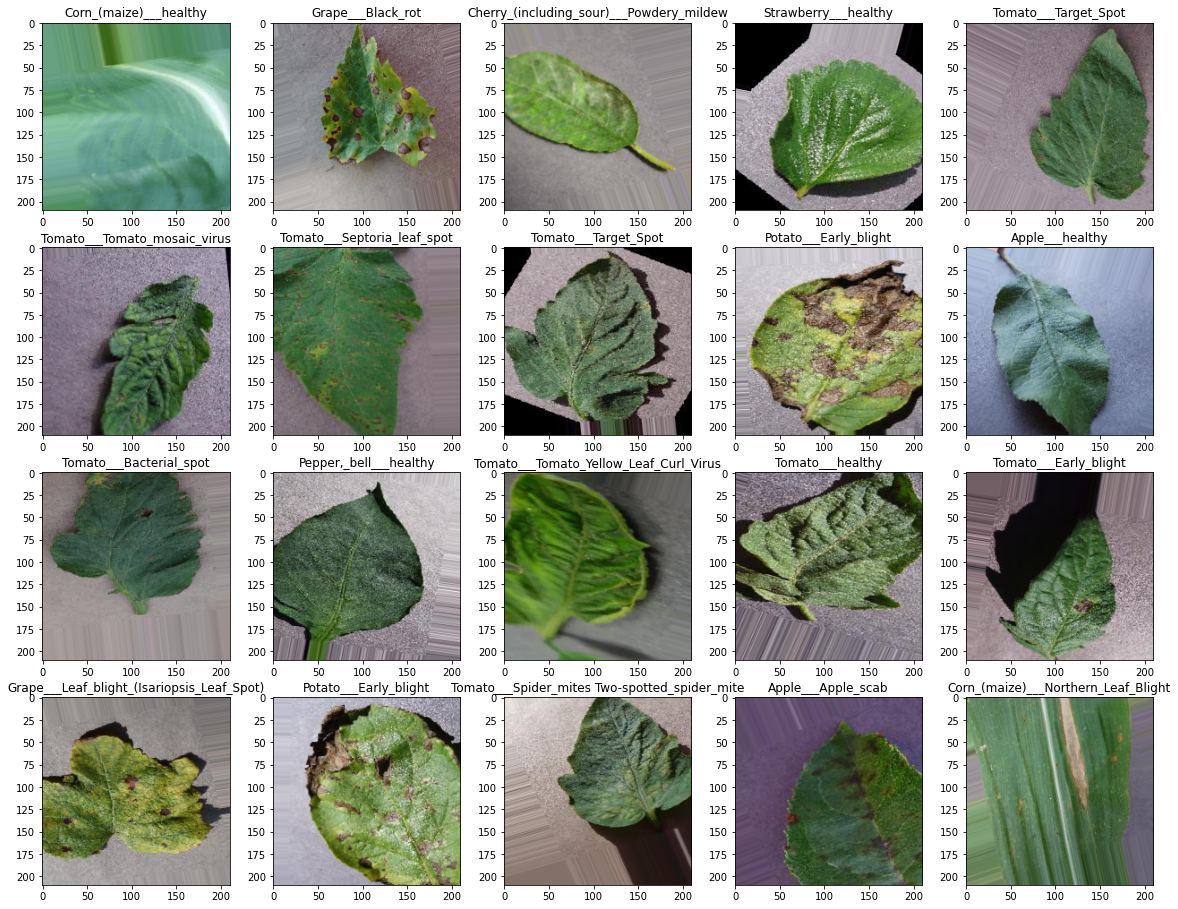

In [6]:
classes=list(train_dataset.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_dataset:
    for i in range(0,20):
        plt.subplot(5,5,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    plt.show()
    break

## Model 1

In [9]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(16,3,activation="relu",padding="same",input_shape=(210,210,3)))
model.add(BatchNormalization())
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(32,3,activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D())
model.add(BatchNormalization())
model.add(keras.layers.Conv2D(128,3,activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D())
model.add(BatchNormalization())

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256,activation="relu"))
model.add(keras.layers.Dense(38,activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 210, 210, 16)      448       
                                                                 
 batch_normalization_3 (Batc  (None, 210, 210, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 105, 105, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 105, 105, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 52, 52, 32)       0         
 2D)                                                             
                                                      

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(train_dataset,validation_data=valid_dataset,epochs = 5)

Epoch 1/5
550/550 [==============================] - 2099s 4s/step - loss: 2.1685 - accuracy: 0.4734 - val_loss: 7.9507 - val_accuracy: 0.2296
Epoch 2/5
550/550 [==============================] - 1872s 3s/step - loss: 0.8575 - accuracy: 0.7372 - val_loss: 0.8929 - val_accuracy: 0.7328
Epoch 3/5
550/550 [==============================] - 1493s 3s/step - loss: 0.5611 - accuracy: 0.8238 - val_loss: 0.4873 - val_accuracy: 0.8505
Epoch 4/5
550/550 [==============================] - 1906s 3s/step - loss: 0.4263 - accuracy: 0.8660 - val_loss: 1.1179 - val_accuracy: 0.7045
Epoch 5/5
550/550 [==============================] - 1821s 3s/step - loss: 0.3466 - accuracy: 0.8906 - val_loss: 0.4606 - val_accuracy: 0.8592


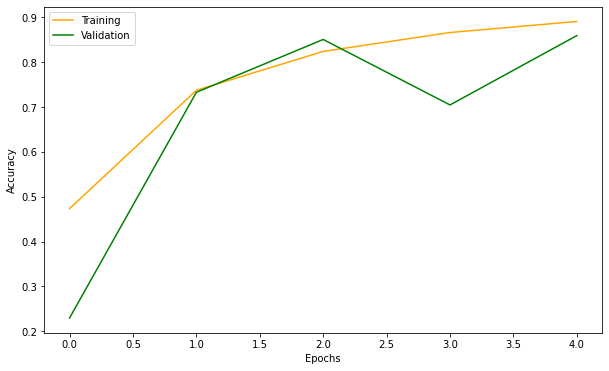

In [14]:
accuracy =history.history['accuracy']
validation_accuracy =history.history['val_accuracy']
epochs = range(len(accuracy))
fig = plt.figure(figsize=(10,6))
plt.plot(epochs,accuracy,c="orange",label="Training")
plt.plot(epochs,validation_accuracy,c="green",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [12]:
model.save("model1.h5")